In [2]:

# Step 6: Patterns & Relationships

# Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#Load cleaned dataset
df = pd.read_excel("IT_HelpDesk_Dataset_Cleaned.xlsx")
df['In_Progress'] = df['Resolved Time'].isnull()  
print("Data loaded. Shape:", df.shape)

# Optional: preview
display(df.head())


Data loaded. Shape: (9355, 33)


,Request ID,Created Time,Assigned Time,Subject,Description,Category,Subcategory,Item,IT Agent,Last Update Time,...,Tokenized_Text,TSBR_Encoded_Category,TSBR_Encoded_Subcategory,TSBR_Category,TSBR_Subcategory,RBR_Category,RBR_Subcategory,MLBR_Category,MLBR_Subcategory,In_Progress
0,297743,2024-01-02 07:59:00,2024-01-02 07:59:00,adobe photoshop,dear tim it selamat tahun baru saya mencoba ke...,Troubleshoot Software,Desktop Application,Other,Al Gifari Prananta Wardhana,2024-03-15 16:10:00,...,"['adobe', 'photoshop', 'dear', 'tim', 'it', 's...",11,48,Unknown,Unknown,Troubleshoot Software,Desktop Application,Troubleshoot Software,Desktop Application,False
1,297745,2024-01-02 08:09:00,2024-01-02 08:09:00,internet gate error,dear bapak ibu selamat pagi mohon bantuannya u...,Troubleshoot Hardware,Peripheral,Omnikey / Card Reader,Rino Ari Sundawa,2024-01-02 13:26:00,...,"['internet', 'gate', 'error', 'dear', 'bapak',...",19,2,Unknown,Network Configuration,Troubleshoot Hardware,Peripheral,Troubleshoot Hardware,Peripheral,False
2,297750,2024-01-02 08:55:00,2024-01-02 08:55:00,laptop mati total,dear all mohon dibantu laptop mati total ruang...,Troubleshoot Hardware,Laptop,Other,Yogi Eka Alfisyahrin,2024-01-02 18:44:00,...,"['laptop', 'mati', 'total', 'dear', 'all', 'mo...",19,20,Unknown,Unknown,Troubleshoot Hardware,Laptop,Troubleshoot Hardware,Laptop,False
3,297753,2024-01-02 09:04:00,2024-01-02 09:04:00,mohon bantuan connect pc printer,dear tim it mohon bantuanyaconnect pc ke print...,Permintaan Setting Konfigurasi PC/Laptop/Printer,Printer,Driver MPS,Rojaya,2024-01-05 09:04:00,...,"['mohon', 'bantuan', 'connect', 'pc', 'printer...",8,41,Unknown,Unknown,Permintaan Setting Konfigurasi PC/Laptop/Printer,Printer,Permintaan Setting Konfigurasi PC/Laptop/Printer,Printer,False
4,297756,2024-01-02 09:13:00,2024-01-02 09:13:00,pc nyala bios setup,dear it help desk minta bantuan pc atas nama t...,Troubleshoot Hardware,PC / Desktop,NaN,Zidni Ilman,2024-01-03 06:20:00,...,"['pc', 'nyala', 'bios', 'setup', 'dear', 'it',...",19,16,Unknown,Unknown,Troubleshoot Hardware,PC / Desktop,Troubleshoot Hardware,PC / Desktop,False


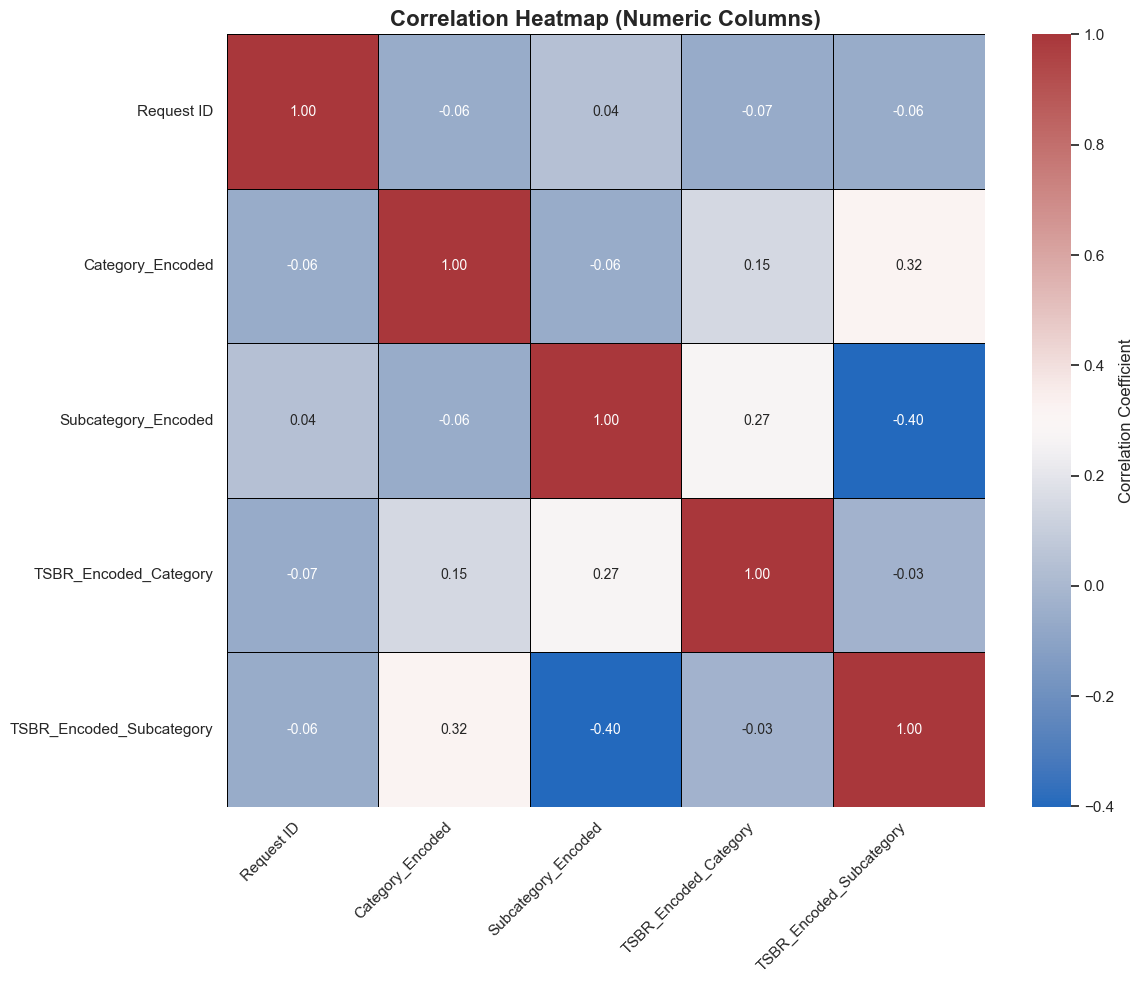

In [3]:

# Correlation Analysis (Numeric Columns)

numeric_cols = df.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(12, 10))
sns.heatmap(
    df[numeric_cols].corr(), 
    annot=True, 
    fmt=".2f", 
    cmap='vlag', 
    linewidths=0.5, 
    linecolor='black',
    cbar_kws={'label': 'Correlation Coefficient'}, 
    annot_kws={"size": 10} 
)
plt.title("Correlation Heatmap (Numeric Columns)", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

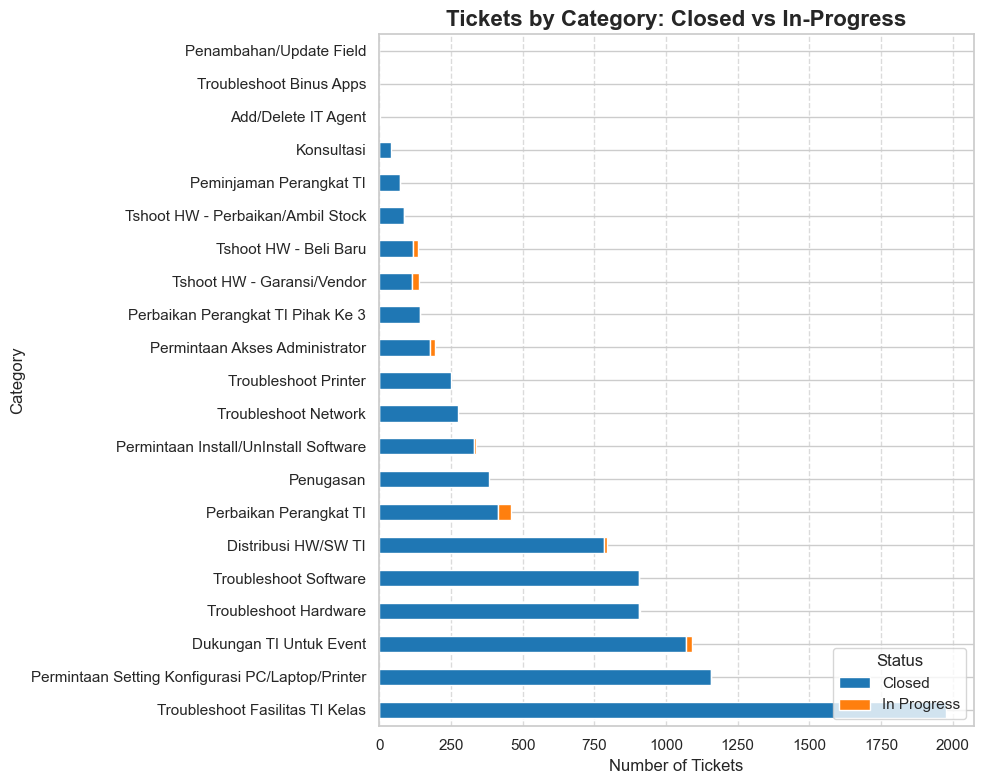

In [4]:
# Crosstabs: Open vs Closed Tickets by Category
category_status = pd.crosstab(df['Category'], df['In_Progress'])

# Sorted by the total number of tickets for better visualization
category_status['Total'] = category_status.sum(axis=1)
category_status = category_status.sort_values(by='Total', ascending=False).drop('Total', axis=1)

# Ensuring 'In_Progress' column is a boolean for correct legend
category_status.columns = ['Closed', 'In Progress'] 

plt.figure(figsize=(10, 8))
category_status.plot(
    kind='barh', 
    stacked=True, 
    color=['#1f77b4', '#ff7f0e'], 
    ax=plt.gca() 
)

plt.title("Tickets by Category: Closed vs In-Progress", fontsize=16, fontweight='bold')
plt.xlabel("Number of Tickets", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.legend(title='Status', loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

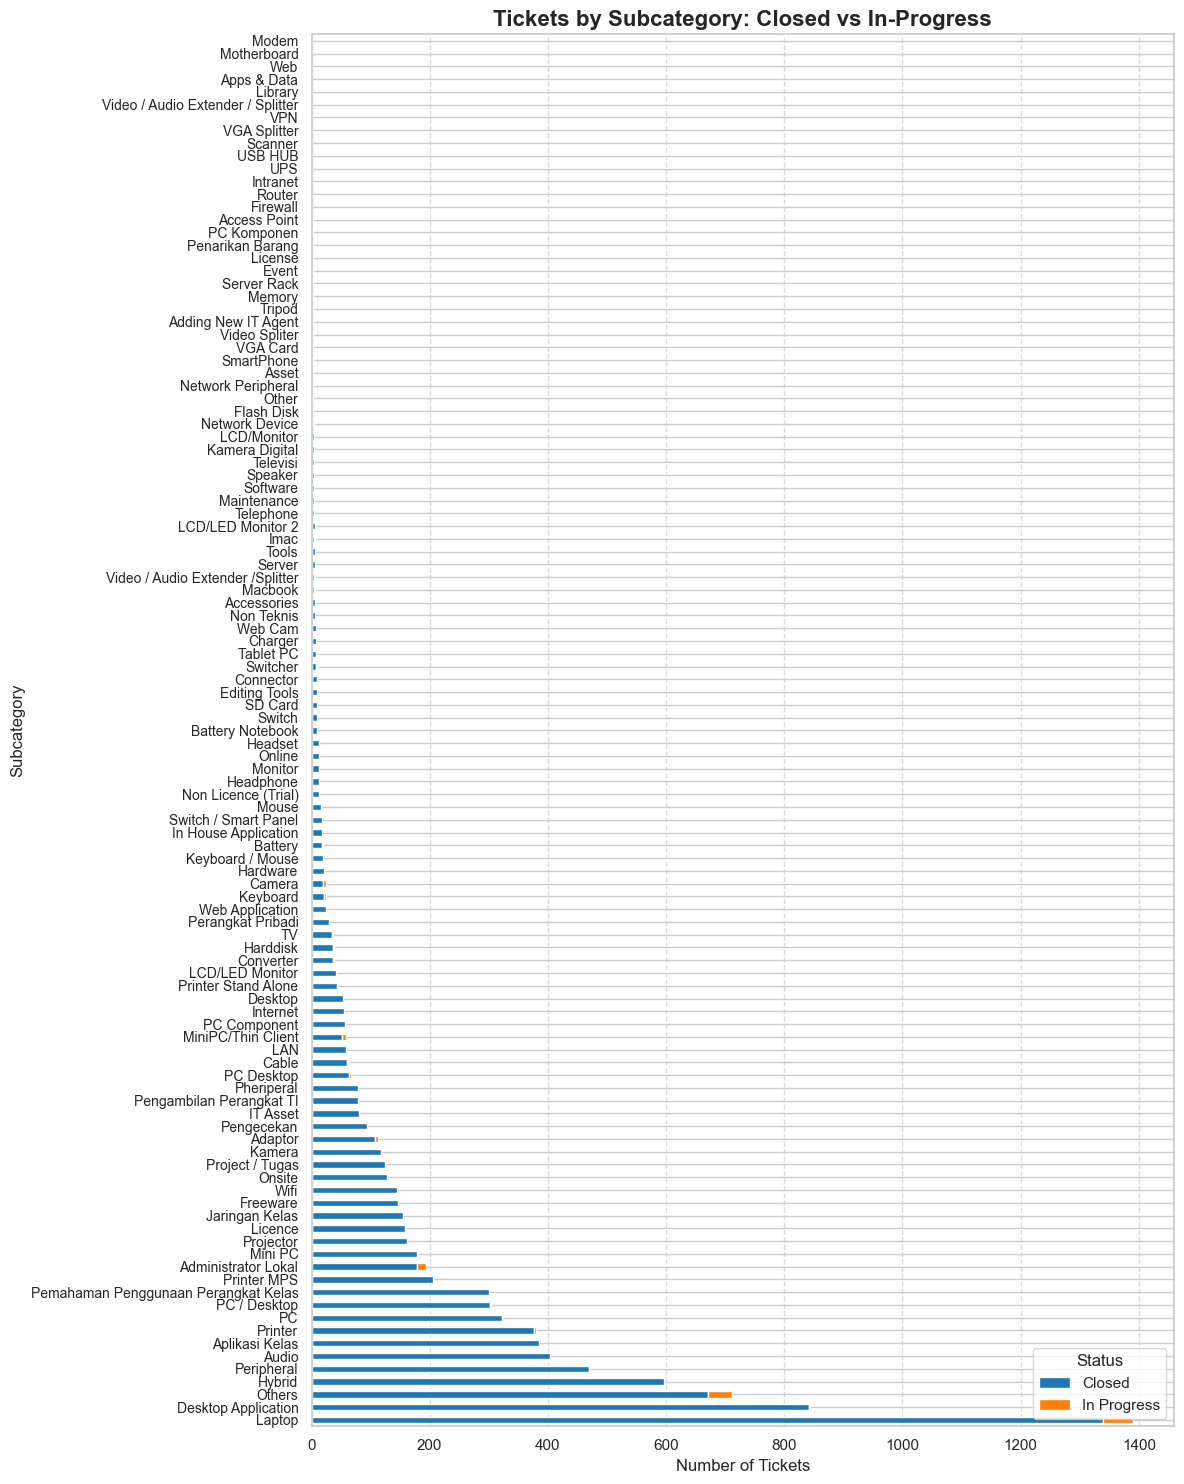

In [5]:
# Crosstabs: Open vs Closed Tickets by Subcategory
subcategory_status = pd.crosstab(df['Subcategory'], df['In_Progress'])

# Sorted by the total number of tickets for better visualization
subcategory_status['Total'] = subcategory_status.sum(axis=1)
subcategory_status = subcategory_status.sort_values(by='Total', ascending=False).drop('Total', axis=1)

# Ensuring column names are set for the legend
subcategory_status.columns = ['Closed', 'In Progress'] 

plt.figure(figsize=(12, 15)) 
subcategory_status.plot(
    kind='barh', 
    stacked=True, 
    color=['#1f77b4', '#ff7f0e'], 
    ax=plt.gca()
)

plt.title("Tickets by Subcategory: Closed vs In-Progress", fontsize=16, fontweight='bold')
plt.xlabel("Number of Tickets", fontsize=12)
plt.ylabel("Subcategory", fontsize=12)
plt.yticks(fontsize=10) 
plt.legend(title='Status', loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
# Only for closed tickets
df_closed = df[~df['In_Progress']].copy()
# Ensuring 'Resolved Time' and 'Created Time' are datetime objects
df_closed['Resolved Time'] = pd.to_datetime(df_closed['Resolved Time'])
df_closed['Created Time'] = pd.to_datetime(df_closed['Created Time'])

df_closed['Resolution_Time_Hours'] = (df_closed['Resolved Time'] - df_closed['Created Time']).dt.total_seconds() / 3600

# Resolution Time Summary (hours):
display(df_closed['Resolution_Time_Hours'].describe())

count    9200.000000
mean      120.368808
std       284.902962
min         0.000000
25%         0.533333
50%        18.850000
75%       101.004167
max      4673.966667
Name: Resolution_Time_Hours, dtype: float64

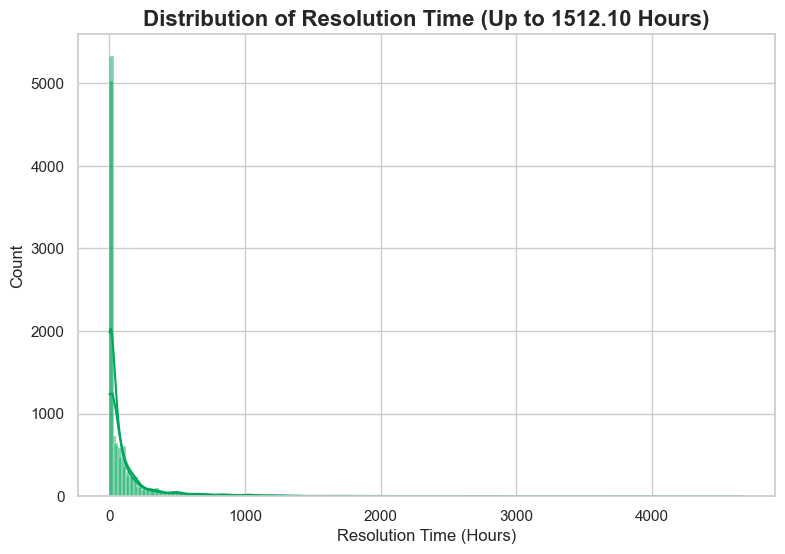

In [7]:
# Histogram
plt.figure(figsize=(9, 6))
sns.histplot(df_closed['Resolution_Time_Hours'], kde=True, log_scale=(False, False), color='#00a65a') # Use a distinct color

# Setting a limit for better visualization (optional)
limit = df_closed['Resolution_Time_Hours'].quantile(0.99)
sns.histplot(df_closed[df_closed['Resolution_Time_Hours'] < limit]['Resolution_Time_Hours'], kde=True, bins=50, color='#00a65a')

plt.title(f"Distribution of Resolution Time (Up to {limit:.2f} Hours)", fontsize=16, fontweight='bold')
plt.xlabel("Resolution Time (Hours)", fontsize=12)
plt.show()

/var/folders/8h/23wk1x3x2_553qdn_l0r6gq40000gn/T/ipykernel_1183/2756469606.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


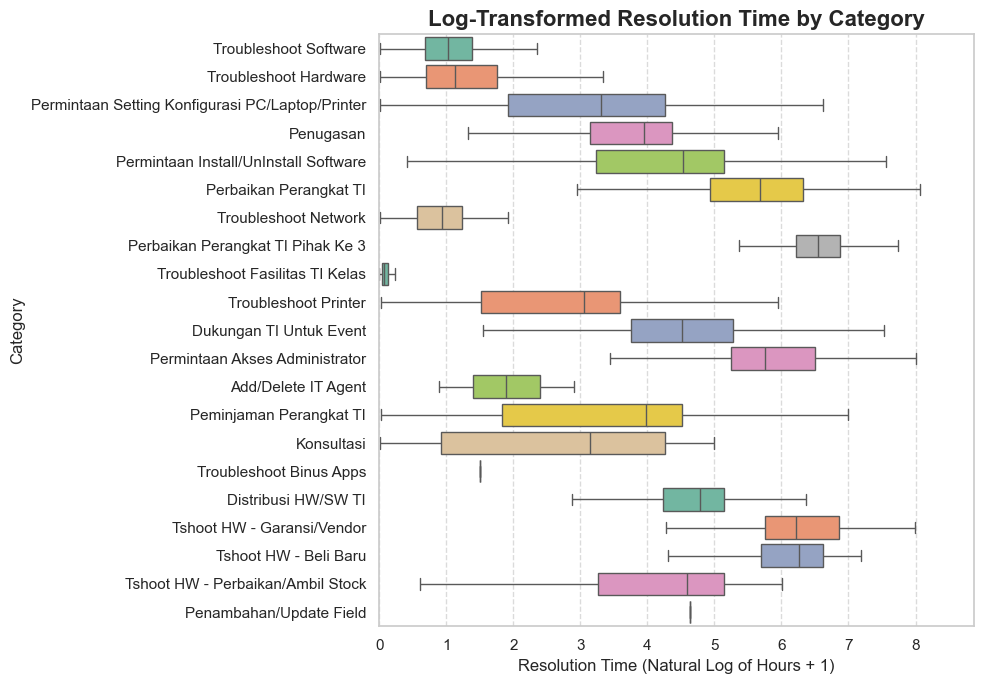

In [20]:
import numpy as np
# Creating a log-transformed column
# Adding a small value (1 hour) to handle cases where resolution time is 0 or very close to 0
df_closed['Log_Resolution_Time'] = np.log1p(df_closed['Resolution_Time_Hours'])

# Boxplot using Log-Scale
plt.figure(figsize=(10, 7)) 
sns.boxplot(
    y='Category',
    x='Log_Resolution_Time', 
    data=df_closed, 
    palette='Set2', 
    showfliers=False # Still hide outliers for visual focus
)

# Setting x-axis limit with 5% padding to ensure whiskers are not cut off
log_max_category = df_closed['Log_Resolution_Time'].max()
plt.xlim(0, log_max_category * 1.05) 

plt.title("Log-Transformed Resolution Time by Category", fontsize=16, fontweight='bold')
plt.xlabel("Resolution Time (Natural Log of Hours + 1)", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/8h/23wk1x3x2_553qdn_l0r6gq40000gn/T/ipykernel_1183/3470456342.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


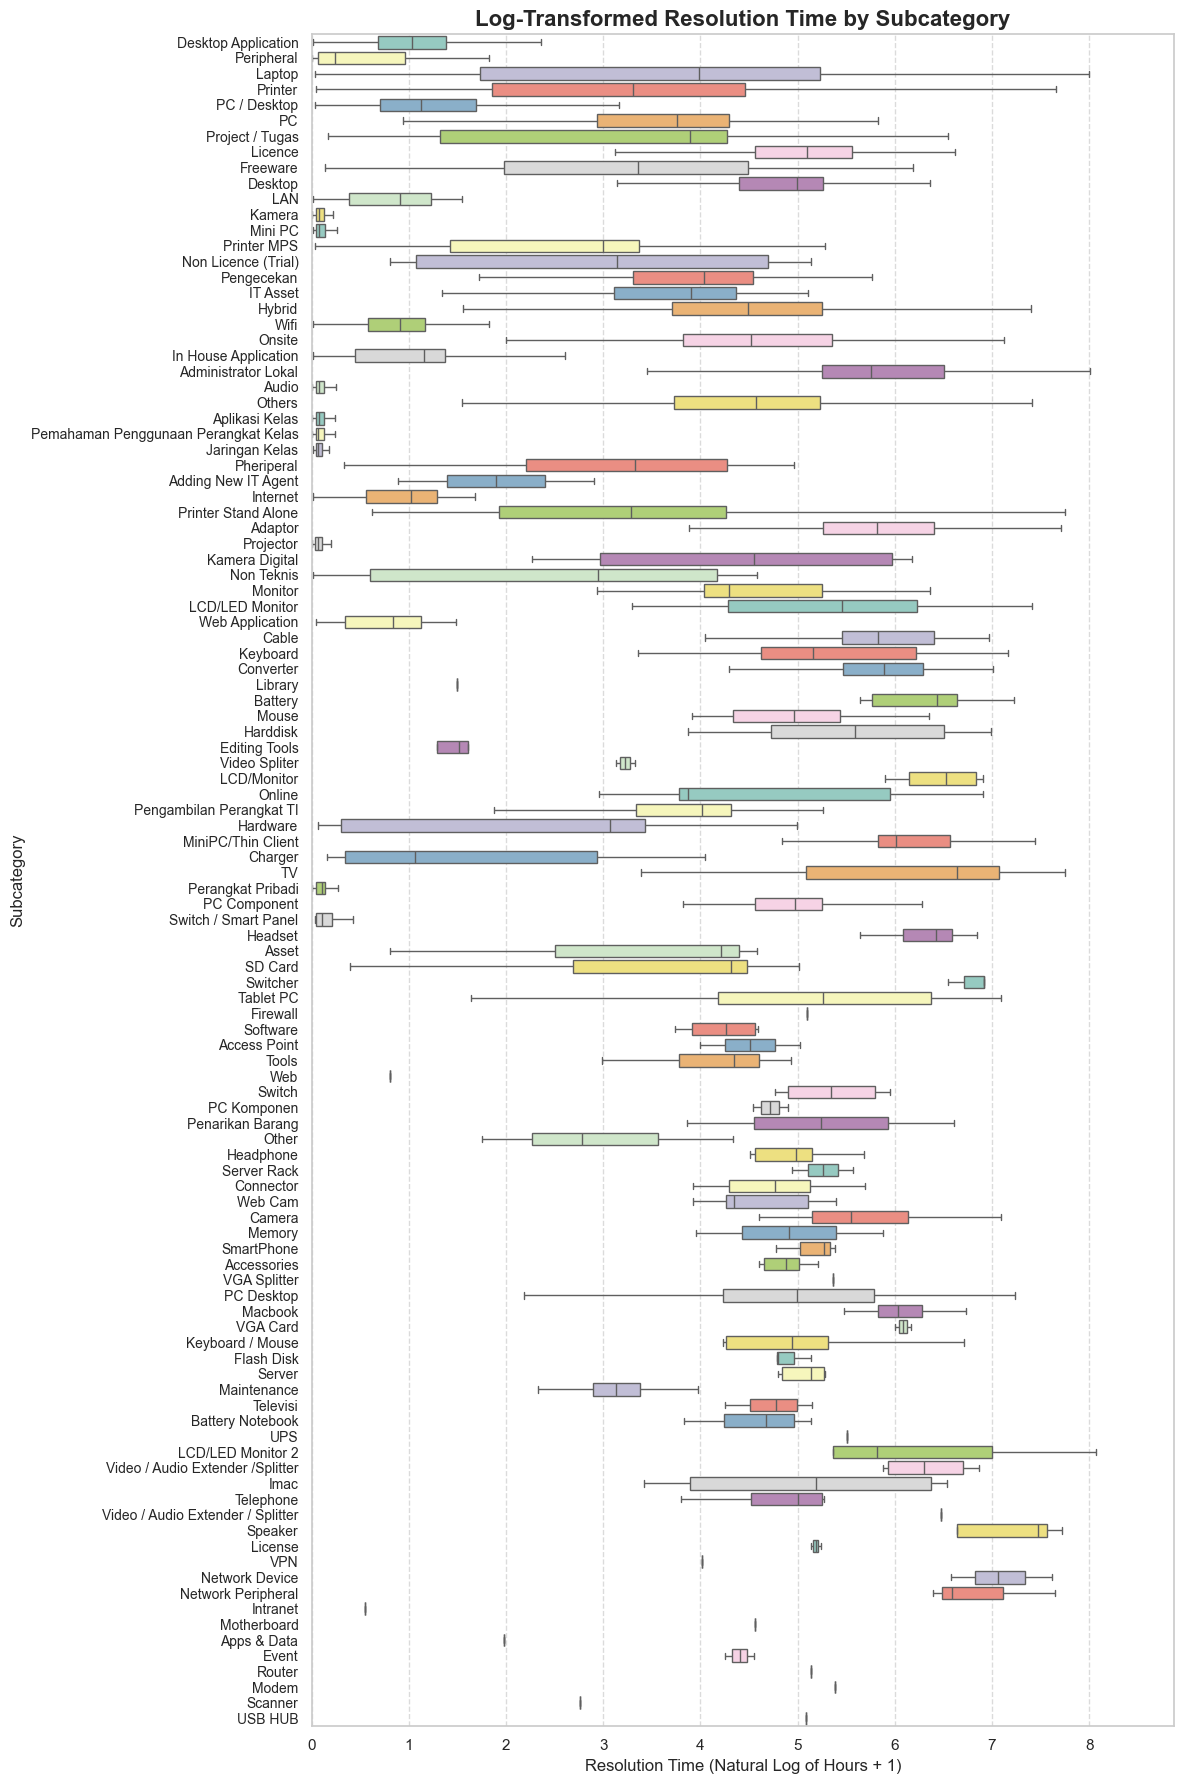

In [21]:
# Boxplot by Subcategory (Log-Transformed)
plt.figure(figsize=(12, 18))
sns.boxplot(
    y='Subcategory',
    x='Log_Resolution_Time', 
    data=df_closed, 
    palette='Set3', 
    showfliers=False
)

# Set x-axis limit with 5% padding
log_max_subcategory = df_closed['Log_Resolution_Time'].max()
plt.xlim(0, log_max_subcategory * 1.05) 

plt.title("Log-Transformed Resolution Time by Subcategory", fontsize=16, fontweight='bold')
plt.xlabel("Resolution Time (Natural Log of Hours + 1)", fontsize=12)
plt.ylabel("Subcategory", fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/8h/23wk1x3x2_553qdn_l0r6gq40000gn/T/ipykernel_1183/2025813202.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


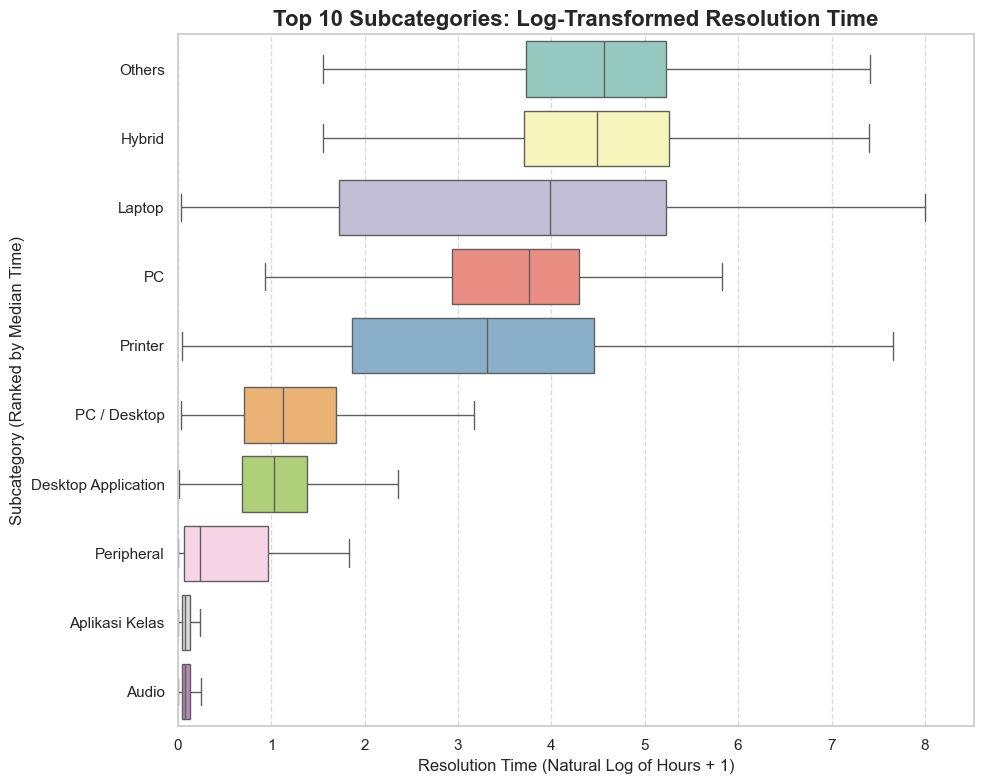

In [26]:
# 1. Identifying the Top 10 Subcategories by Volume
top_10_subcategories = df['Subcategory'].value_counts().nlargest(10).index.tolist()

# 2. Filtering for only the Top 10
df_top_10 = df_closed[df_closed['Subcategory'].isin(top_10_subcategories)].copy()

# 3. Sorting the categories by median resolution time (slowest at the top)
median_order = df_top_10.groupby('Subcategory')['Log_Resolution_Time'].median().sort_values(ascending=False).index


# 4. Plotting
plt.figure(figsize=(10, 8)) 

sns.boxplot(
    y='Subcategory',
    x='Log_Resolution_Time', 
    data=df_top_10, 
    palette='Set3', 
    showfliers=False, # Hide outliers
    order=median_order # Apply the sorting
)


log_max_top_10 = df_top_10['Log_Resolution_Time'].max()
plt.xlim(0, log_max_top_10 * 1.05) 

plt.title("Top 10 Subcategories: Log-Transformed Resolution Time", fontsize=16, fontweight='bold')
plt.xlabel("Resolution Time (Natural Log of Hours + 1)", fontsize=12)
plt.ylabel("Subcategory (Ranked by Median Time)", fontsize=12)
plt.yticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/8h/23wk1x3x2_553qdn_l0r6gq40000gn/T/ipykernel_1183/980086111.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volume = df_time['Request ID'].resample('M').count()


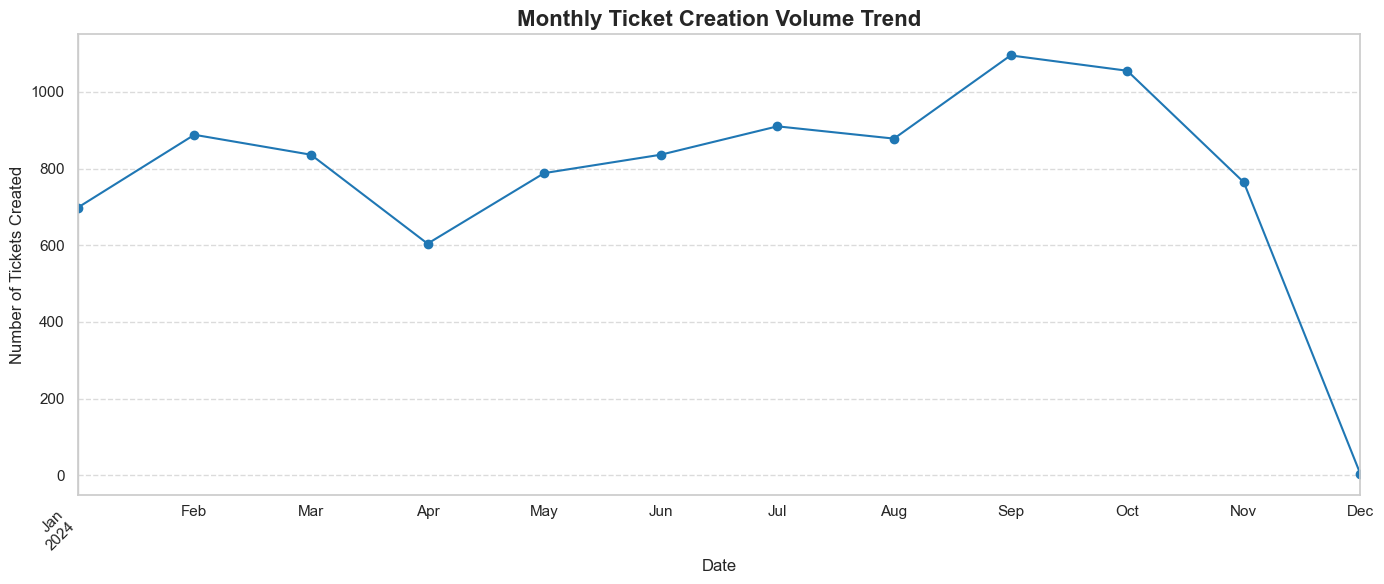

In [25]:
# 1.'Created Time' as the index
df_time = df.set_index('Created Time')

# 2. Resampling the data to count tickets monthly ('M')
#'Request ID' and count the unique occurrences
monthly_volume = df_time['Request ID'].resample('M').count()

# 3. Plot time series
plt.figure(figsize=(14, 6))
monthly_volume.plot(
    kind='line', 
    marker='o', 
    linestyle='-', 
    color='#1f77b4'
)

plt.title("Monthly Ticket Creation Volume Trend", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Tickets Created", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()